# A Deep Learning based Efficacy Prediction System for Drug Discovery

In [7]:
# /mnt/d/Research/PHD/DLEPS/code/DLEPS/DLEPS_tutorial.py

# 导入所需模块
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/mnt/d/Research/PHD/DLEPS/code/DLEPS')
from dleps_predictor import DLEPS

Load the SMILES for natural products and FDA approved drugs

In [8]:
# 加载天然产物和 FDA 批准药物的 SMILES 数据
smi = pd.read_csv('/mnt/d/Research/PHD/DLEPS/data/Brief_Targetmol_natural_product_2719')
fda = pd.read_csv('/mnt/d/Research/PHD/DLEPS/data/Brief_FDA-Approved-Drug_961')

In [9]:
smi
# 查看天然产物数据
print("天然产物数据预览：")
print(smi.head())

天然产物数据预览：
   Unnamed: 0       ID                                      Name   CAS Number  \
0           0  TCS0002                                  Visnagin      82-57-5   
1           1  TTS0001                                   Khellin      82-02-0   
2           2  TCS0010                        Trans-caffeic acid     501-16-6   
3           3  TCS0008                        Ethyl (E)-ferulate   28028-62-8   
4           4  TCS0005  Ethyl (E)-3'-hydroxy-4'-methoxycinnamate  155401-23-3   

                                  SMILES  
0    CC1=CC(=O)C2=C(O1)C=C3C(=C2OC)C=CO3  
1  COC1=C2OC(C)=CC(=O)C2=C(OC)C2=C1OC=C2  
2             C1=CC(=C(C=C1C=CC(=O)O)O)O  
3          CCOC(=O)C=CC1=CC(=C(C=C1)O)OC  
4          CCOC(=O)C=CC1=CC(=C(C=C1)OC)O  




Load the DLEPS model. DLEPS requires up set of genes and down set of genes to calculate cs = a - b , or only one set for calculating a.

In [10]:
# 初始化 DLEPS 模型
# 指定模型权重路径为训练后生成的模型权重文件
predictor = DLEPS(
    reverse=False, 
    up_name='/mnt/d/Research/PHD/DLEPS/data/BROWNING_up',
    down_name='/mnt/d/Research/PHD/DLEPS/data/BROWNING_down',
    save_exp=None,
    model_weights_path='/mnt/d/Research/PHD/DLEPS/code/DLEPS/my_trained_model.h5'  # 指定训练后保存的模型权重文件路径
)


/mnt/d/Research/PHD/DLEPS/data/BROWNING_up
(127, 1)
[2289, 6515, 18, 23284, 6332, 1535, 225, 4969, 128553, 713, 273, 89944, 3489, 894, 183, 10089, 894, 4811, 3479, 637, 5919, 5176, 26577, 8534, 7056, 6586, 2246, 1009, 301, 112464, 2162, 2867, 8707, 56301, 1075, 3075, 3487, 55722, 7253, 26227, 2200, 4094, 8707, 6641, 5792, 894, 5598, 712, 2335, 2331, 2331, 1803, 10462, 23329, 7490, 4321, 6943, 10512, 9747, 7791, 89944, 165, 26227, 80114, 27303, 10149, 9843, 2202, 54796, 57828, 11096, 8407, 12, 7018, 2331, 2012, 91851, 3224, 2823, 26227, 3995, 4826, 5325, 23596, 3952, 3995, 717, 5179, 6590, 29968, 23767, 29968, 717, 91851, 10149, 80761, 25797, 91851, 2940, 7348, 216, 2331, 6623, 6783, 80761]
/mnt/d/Research/PHD/DLEPS/data/BROWNING_down
(130, 1)
[1149, 7350, 79741, 1346, 3777, 26027, 2170, 1734, 56997, 3777, 84830, 5026, 10205, 1370, 3164, 375449, 4151, 5465, 1908, 5997, 9026, 10205, 26027, 5166, 25841, 51807, 1787, 53405, 79071, 1734, 4137, 8395, 54802, 10449, 6470, 25849, 3423, 7200, 86



The model structure showed followed

In [11]:
# 查看模型结构
predictor.model[0].summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 277, 76)      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 269, 9)       6165        input_8[0][0]                    
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 261, 9)       738         conv_1[0][0]                     
__________________________________________________________________________________________________
conv_3 (Conv1D)                 (None, 251, 10)      1000        conv_2[0][0]                     
___________________________________________________________________________________________



Execute model inference, input requires a SMILES array, output is a cs array with -2 for unsuccessed processing. 
predict function has the followed options:
predict(self, setmean = False, save_onehot=None, load_onehot=None, reverse = True, base = -2, up_name='\', down_name='', save_exp = None)

setmean : False, z score (Change of Transcriptional Profiles, CTP) = expression level - mean, setmean refers to mean of expression files for user inputed chemicals \
save_onehot: None, save onehot array for the current chemical set for future use \
load_onehot: None, load onehot if onehot files have been saved \
reverse: True, do user want to reverse the input up / down gene set, only works for the paired input \
base: -2, default value for error parsed small molecules

In [12]:
# 模型推理
# 输入：SMILES 数组
# 输出：cs 数组，其中 -2 表示处理失败的小分子
scores = predictor.predict(fda['SMILES'].values)
#scores = predictor.predict(celastrol)

DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large

In [13]:
fda
# 打印 FDA 批准药物数据
print("FDA 批准药物数据预览：")
print(fda.head())

FDA 批准药物数据预览：
   Unnamed: 0     ID                   Name   CAS Number  \
0           0  S1001   Navitoclax (ABT-263)  923564-51-6   
1           1  S1003    Linifanib (ABT-869)  796967-16-3   
2           2  S1004    Veliparib (ABT-888)  912444-00-9   
3           3  S1005               Axitinib  319460-85-0   
4           4  S1006  Saracatinib (AZD0530)  379231-04-6   

                                              SMILES  
0  CC1(C)CCC(=C(CN2CCN(CC2)C2=CC=C(C=C2)C(=O)NS(=...  
1  CC1=CC(NC(=O)NC2=CC=C(C=C2)C2=C3C(N)=NNC3=CC=C...  
2           C[C@@]1(CCCN1)C1=NC2=C(C=CC=C2N1)C(N)=O   
3  CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...  
4  CN1CCN(CCOC2=CC(OC3CCOCC3)=C3C(NC4=C(Cl)C=CC5=...  




Visualize the cs scores

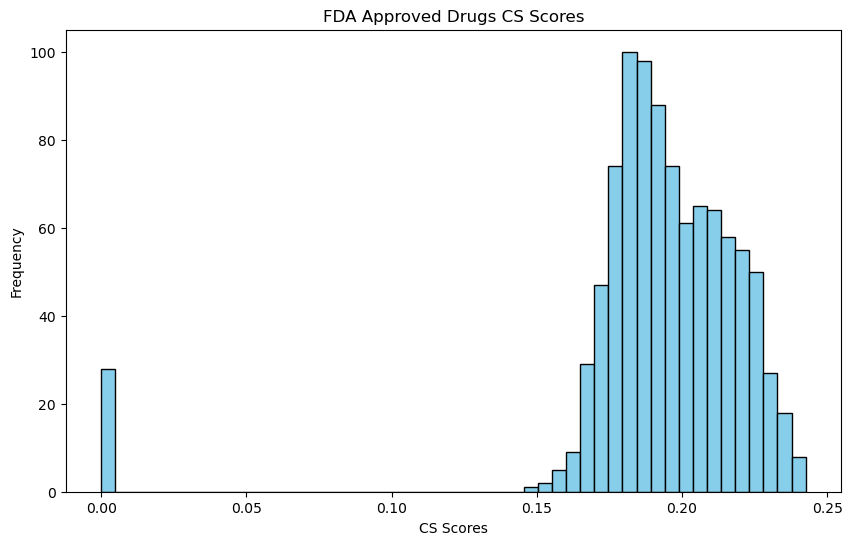

In [14]:
# 可视化 cs 得分
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', edgecolor='black')
plt.title("FDA Approved Drugs CS Scores")
plt.xlabel("CS Scores")
plt.ylabel("Frequency")
plt.show()

In [15]:
# 将预测得分添加到 FDA 数据中
fda['score'] = scores

In [16]:
# 查看更新后的 FDA 数据
print("更新后的 FDA 批准药物数据预览：")
print(fda.head())
fda

更新后的 FDA 批准药物数据预览：
   Unnamed: 0     ID                   Name   CAS Number  \
0           0  S1001   Navitoclax (ABT-263)  923564-51-6   
1           1  S1003    Linifanib (ABT-869)  796967-16-3   
2           2  S1004    Veliparib (ABT-888)  912444-00-9   
3           3  S1005               Axitinib  319460-85-0   
4           4  S1006  Saracatinib (AZD0530)  379231-04-6   

                                              SMILES     score  
0  CC1(C)CCC(=C(CN2CCN(CC2)C2=CC=C(C=C2)C(=O)NS(=...  0.000000  
1  CC1=CC(NC(=O)NC2=CC=C(C=C2)C2=C3C(N)=NNC3=CC=C...  0.196985  
2           C[C@@]1(CCCN1)C1=NC2=C(C=CC=C2N1)C(N)=O   0.217482  
3  CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...  0.191675  
4  CN1CCN(CCOC2=CC(OC3CCOCC3)=C3C(NC4=C(Cl)C=CC5=...  0.201697  


,Unnamed: 0,ID,Name,CAS Number,SMILES,score
0,0,S1001,Navitoclax (ABT-263),923564-51-6,CC1(C)CCC(=C(CN2CCN(CC2)C2=CC=C(C=C2)C(=O)NS(=...,0.000000
1,1,S1003,Linifanib (ABT-869),796967-16-3,CC1=CC(NC(=O)NC2=CC=C(C=C2)C2=C3C(N)=NNC3=CC=C...,0.196985
2,2,S1004,Veliparib (ABT-888),912444-00-9,C[C@@]1(CCCN1)C1=NC2=C(C=CC=C2N1)C(N)=O,0.217482
3,3,S1005,Axitinib,319460-85-0,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...,0.191675
4,4,S1006,Saracatinib (AZD0530),379231-04-6,CN1CCN(CCOC2=CC(OC3CCOCC3)=C3C(NC4=C(Cl)C=CC5=...,0.201697
...,...,...,...,...,...,...
956,956,S4653,L-Ornithine,70-26-8,NCCC[C@H](N)C(O)=O,0.226061
957,957,S4671,Cefradine,38821-53-3,[H][C@]12SCC(C)=C(N1C(=O)[C@H]2NC(=O)[C@H](N)C...,0.195805
958,958,S4684,Sildenafil,139755-83-2,CCCC1=NN(C)C2=C1N=C(NC2=O)C1=CC(=CC=C1OCC)S(=O...,0.186631
959,959,S4700,4-Aminobutyric acid,56-12-2,NCCCC(O)=O,0.226168


In [17]:
# 如果需要保存结果到文件，可以取消以下注释：
# fda = fda.set_index('Unnamed: 0')
# fda.to_csv('../../results/fda_HUA_merge.csv')
# print("FDA 预测结果已保存到 '../../results/fda_HUA_merge.csv'")


In [18]:
# 对天然产物数据进行预测
smi_scores = predictor.predict(smi['SMILES'].values)

DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large

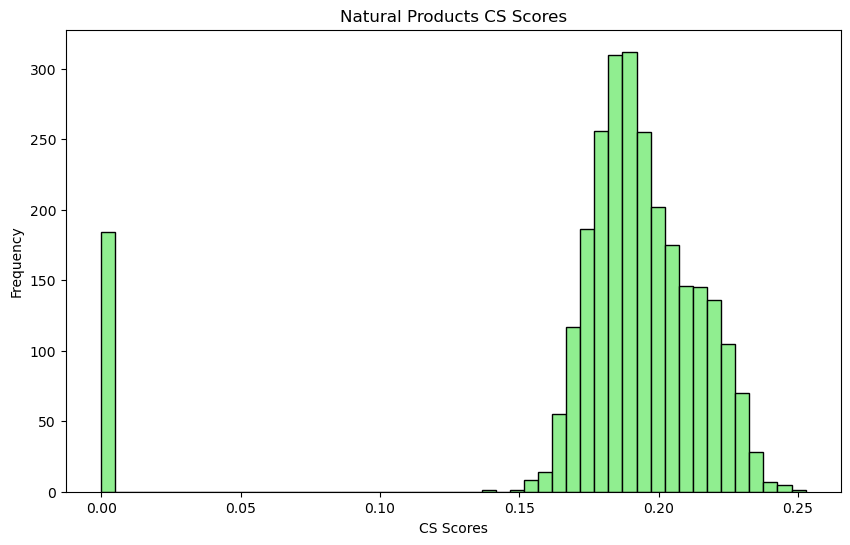

In [19]:
# 可视化天然产物的 cs 得分
plt.figure(figsize=(10, 6))
plt.hist(smi_scores, bins=50, color='lightgreen', edgecolor='black')
plt.title("Natural Products CS Scores")
plt.xlabel("CS Scores")
plt.ylabel("Frequency")
plt.show()

In [20]:
# 将预测得分添加到天然产物数据中
smi['score'] = smi_scores

In [21]:
# 设置天然产物数据的索引
# 假设 'Unnamed: 0' 是需要设置为索引的列名，根据实际数据调整
# 如果 'Unnamed: 0' 不存在，请更改为实际的列名或移除此行
smi = smi.set_index('Unnamed: 0')

In [22]:
# 打印更新后的天然产物数据
print("更新后的天然产物数据预览：")
print(smi.head())

更新后的天然产物数据预览：
                 ID                                      Name   CAS Number  \
Unnamed: 0                                                                   
0           TCS0002                                  Visnagin      82-57-5   
1           TTS0001                                   Khellin      82-02-0   
2           TCS0010                        Trans-caffeic acid     501-16-6   
3           TCS0008                        Ethyl (E)-ferulate   28028-62-8   
4           TCS0005  Ethyl (E)-3'-hydroxy-4'-methoxycinnamate  155401-23-3   

                                           SMILES     score  
Unnamed: 0                                                   
0             CC1=CC(=O)C2=C(O1)C=C3C(=C2OC)C=CO3  0.159355  
1           COC1=C2OC(C)=CC(=O)C2=C(OC)C2=C1OC=C2  0.213345  
2                      C1=CC(=C(C=C1C=CC(=O)O)O)O  0.203449  
3                   CCOC(=O)C=CC1=CC(=C(C=C1)O)OC  0.194435  
4                   CCOC(=O)C=CC1=CC(=C(C=C1)OC)O  0.182178  


In [23]:
# 如果需要保存结果到文件，可以取消以下注释：
# smi.to_csv('../../results/natural_product_scores.csv')
# print("天然产物预测结果已保存到 '../../results/natural_product_scores.csv'")